# Iris Flower Data Set

source: https://www.kaggle.com/uciml/iris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('archive/Iris.csv')
df = df.drop('Id', axis = 1)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1. What is the average Sepal/Petal length and width?

In [6]:
def findAvg(array):
    return round(sum(array) / len(array), 2)

print('Average sepal length: ' + str(findAvg(df['SepalLengthCm'])) + ' cm')
print('Average sepal width: ' + str(findAvg(df['SepalWidthCm'])) + ' cm')
print('Average petal length: ' + str(findAvg(df['PetalLengthCm'])) + ' cm')
print('Average petal width: ' + str(findAvg(df['PetalWidthCm'])) + ' cm')

Average sepal length: 5.84 cm
Average sepal width: 3.05 cm
Average petal length: 3.76 cm
Average petal width: 1.2 cm


## 2. What is the characteristic of iris flowers sizes?

<AxesSubplot:>

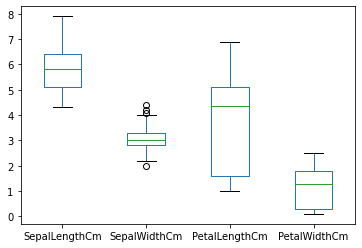

In [7]:
df.plot(kind = 'box', sharex = False, sharey = False)

Iris flowers tends to be larger in length and smaller in width.

## 3. What is the distribution of each feature?

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

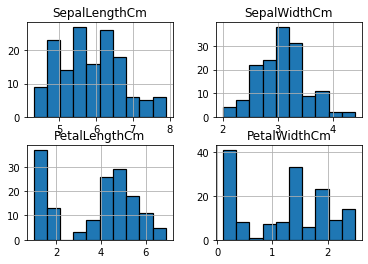

In [8]:
df.hist(edgecolor = 'black', linewidth = 1.2)

The sepals of iris flowers are closely distributed and tends to assemble a bell curve. The petals, however, has distinctive distributions either close to 0 or not at all.

## 4. What does the relationship between each feature look like?

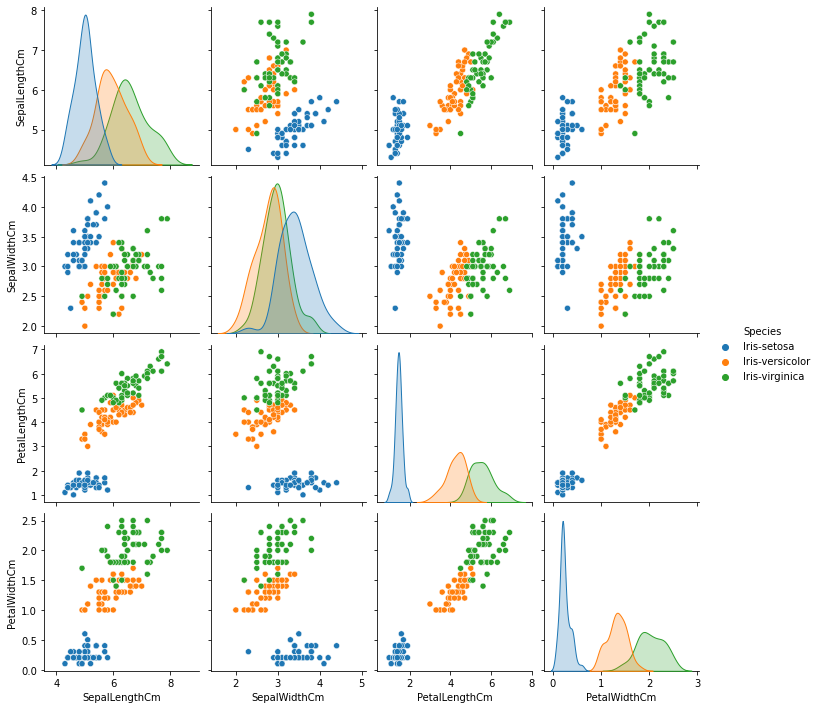

In [9]:
sns.pairplot(df, hue = 'Species')

- Iris setosa tends to have short sepal/petal length and width.
- Iris versicolor tends to have medium sepal/petal length and width.
- Iris virginica tends to have long sepal/petal length and width.

## 5. What is the correlation between sepal/petal width and length?

<AxesSubplot:>

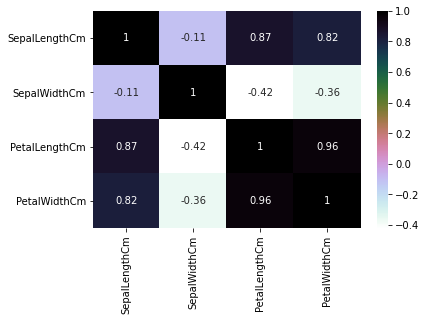

In [10]:
sns.heatmap(df.corr(), annot = True, cmap = 'cubehelix_r')

Sepal length and width are not correlated. Petal length and width are correlated.

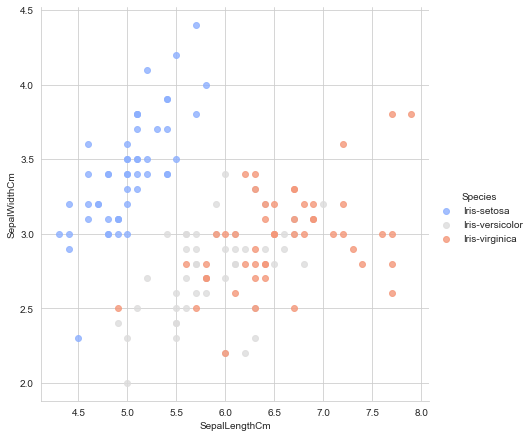

In [11]:
sns.set_style('whitegrid')
sns.lmplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df, hue = 'Species', palette = 'coolwarm', height = 6, aspect = 1, fit_reg = False)

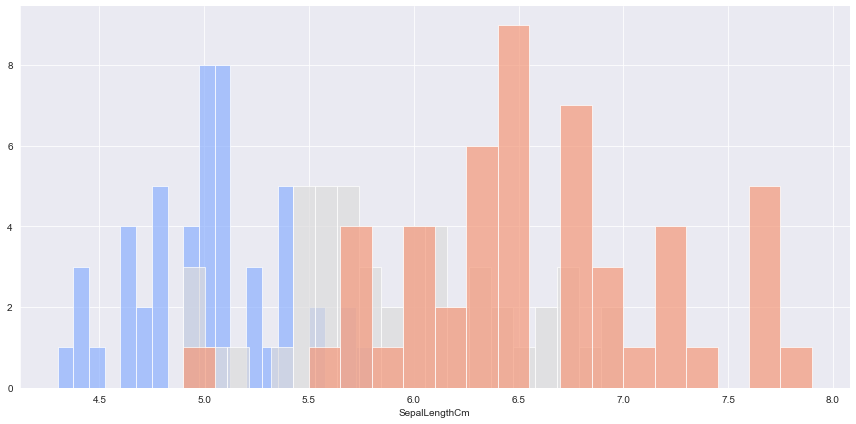

In [12]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue = 'Species', palette = 'coolwarm', height = 6, aspect = 2)
g.map(plt.hist, 'SepalLengthCm', bins = 20, alpha = 0.7)

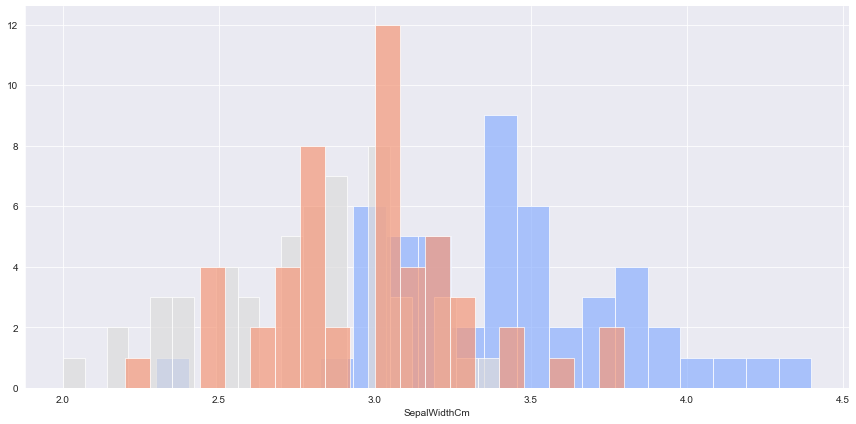

In [13]:
g = sns.FacetGrid(df, hue = 'Species', palette = 'coolwarm', height = 6, aspect = 2)
g.map(plt.hist, 'SepalWidthCm', bins = 20, alpha = 0.7)

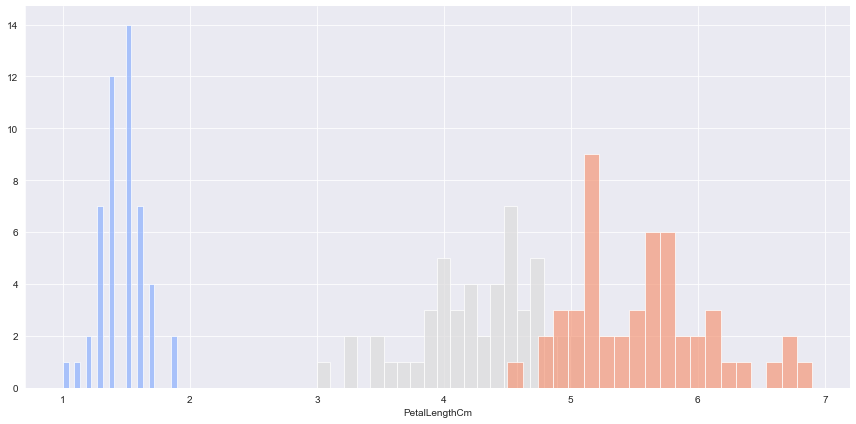

In [14]:
g = sns.FacetGrid(df, hue = 'Species', palette = 'coolwarm', height = 6, aspect = 2)
g.map(plt.hist, 'PetalLengthCm', bins = 20, alpha = 0.7)

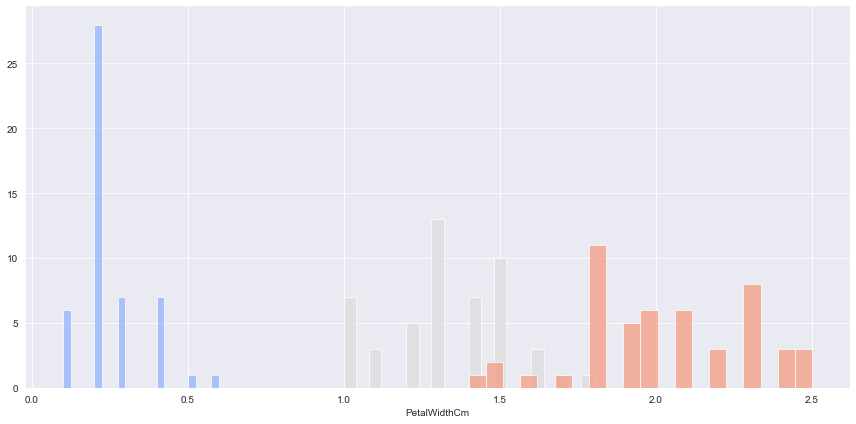

In [15]:
g = sns.FacetGrid(df, hue = 'Species', palette = 'coolwarm', height = 6, aspect = 2)
g.map(plt.hist, 'PetalWidthCm', bins = 20, alpha = 0.7)

## Create model using logistic regression

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
classifier = LogisticRegression(solver = 'lbfgs', max_iter = 200)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [20]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [21]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [22]:
print('accuracy is', accuracy_score(y_pred,y_test))

accuracy is 1.0


## Create model using support vector machine

In [23]:
from sklearn import svm
from sklearn import metrics

In [24]:
train, test = train_test_split(df, test_size = 0.3)

In [25]:
print(train.shape)

(105, 5)


In [26]:
print(test.shape)

(45, 5)


In [27]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [28]:
train_x.head(2)
test_x.head(2)
train_y.head()
test_y.head()

120     Iris-virginica
74     Iris-versicolor
57     Iris-versicolor
148     Iris-virginica
29         Iris-setosa
Name: Species, dtype: object

In [29]:
model = svm.SVC()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9777777777777777


## Create model using decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_y))

The accuracy of the Decision Tree is 0.9555555555555556
